In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)

In [4]:
t = np.linspace(0, 1, 41)

In [5]:
xrange = np.linspace(0, 1, 101)
yrange = np.linspace(0, 1, 101)
xmesh, ymesh = np.meshgrid(xrange, yrange)

In [6]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

$$ f_1(x, y, t) = e^{-t}(cos2\pi xcos2\pi y + sin2\pi xsin2\pi y) $$
$$ f_2(x, y, t) = x + y + t $$
$$ f_3(x, y, t) = e^{-t}(2sin2\pi x + sin2\pi xcos2\pi y) $$

Case 1: f1

In [7]:
out1 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out1[i, j, k] = np.exp(-t[i])*(np.cos(2*np.pi*x[j])*np.cos(2*np.pi*y[k])
                                           + np.sin(2*np.pi*x[j])*np.sin(2*np.pi*y[k]))

In [8]:
out1[0, :, :]

array([[1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ],
       [0.99802673, 1.        , 0.99802673, ..., 0.98228725, 0.9921147 ,
        0.99802673],
       [0.9921147 , 0.99802673, 1.        , ..., 0.96858316, 0.98228725,
        0.9921147 ],
       ...,
       [0.9921147 , 0.98228725, 0.96858316, ..., 1.        , 0.99802673,
        0.9921147 ],
       [0.99802673, 0.9921147 , 0.98228725, ..., 0.99802673, 1.        ,
        0.99802673],
       [1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ]])

In [9]:
sensor1 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor1[i, j, k] = out1[i, 20*(j+1)+1, 20*(k+1)+1]

In [10]:
sensor1.shape

(41, 4, 4)

In [19]:
sensor1 = sensor1.reshape((41, 16))

In [20]:
sensor1.shape

(41, 16)

In [24]:
out1 = out1.reshape((41, -1))

In [25]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(sensor1, out1, test_size=0.18, random_state=42)

In [29]:
# Random Forest (RF)
rfr1 = RandomForestRegressor(n_estimators = 1000, max_depth = 100, random_state = 15)
rfr2 = RandomForestRegressor(n_estimators = 1000, max_depth = 100, random_state = 15)
rfr3 = RandomForestRegressor(n_estimators = 1000, max_depth = 100, random_state = 15)

In [30]:
start1 = datetime.datetime.now()
rfr1.fit(x_train1, y_train1)
end1 = datetime.datetime.now()
time1 = end1 - start1
print("Training time (Case 1):", time1)

Training time (Case 1): 0:00:40.949935


In [31]:
relation_square_train1 = rfr1.score(x_train1, y_train1)
print('결정계수(training)(%d): ' %i, relation_square_train1)
relation_square_test1 = rfr1.score(x_test1, y_test1)
print('결정계수(test)(%d): ' %i, relation_square_test1)
y_p_train1 = rfr1.predict(x_train1)
y_p_test1 = rfr1.predict(x_test1)

결정계수(training)(40):  0.9994377617356309
결정계수(test)(40):  0.9946646928740659


In [54]:
y_train1 = y_train1.reshape((33, 101, 101))
y_test1 = y_test1.reshape((8, 101, 101))
y_p_train1 = y_p_train1.reshape((33, 101, 101))
y_p_test1 = y_p_test1.reshape((8, 101, 101))

In [73]:
error_train_abs1 = np.abs(y_p_train1 - y_train1)
l2_error_train1 = np.sqrt(np.sum((y_p_train1 - y_train1)**2) / np.sum(y_train1**2))
print('l2_train = %.4f' %l2_error_train1)

l2_error_train_list1 = []
for j in range(0, x_train1.shape[0]):
    l2_error_train_data1 = np.sqrt(np.sum((y_p_train1[j] - y_train1[j])**2) / np.sum(y_train1[j]**2))
    l2_error_train_list1.append(l2_error_train_data1)
    
error_test_abs1 = np.abs(y_p_test1 - y_test1)
l2_error_test1 = np.sqrt(np.sum((y_p_test1 - y_test1)**2) / np.sum(y_test1**2))
print('l2_test = %.4f' %l2_error_test1)

l2_error_test_list1 = []
for j in range(0, x_test1.shape[0]):
    l2_error_test_data1 = np.sqrt(np.sum((y_p_test1[j] - y_test1[j])**2) / np.sum(y_test1[j]**2))
    l2_error_test_list1.append(l2_error_test_data1)

l2_train = 0.0066
l2_test = 0.0208


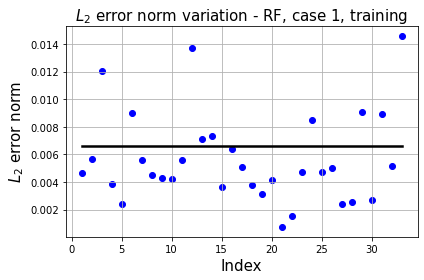

In [68]:
plt.plot(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train1*np.ones(x_train1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - RF, case 1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

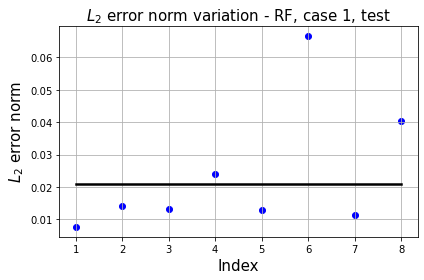

In [71]:
plt.plot(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test1*np.ones(x_test1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - RF, case 1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

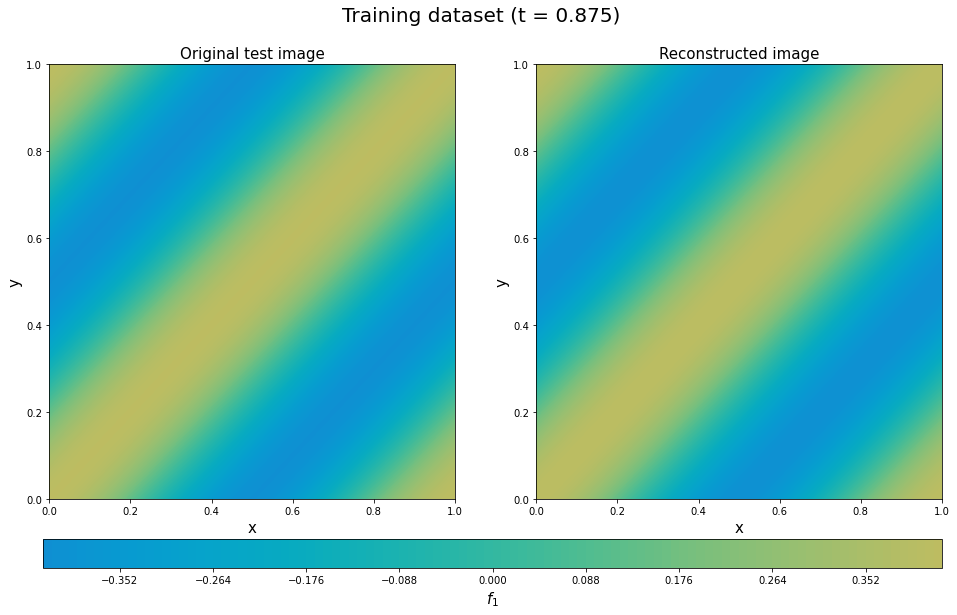

In [52]:
plt.figure(figsize=(16, 8))
y_train1_9_rotate = y_train1[9].T.reshape(101,101)
decoded_rotate1 = y_p_train1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_9_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[35]),fontsize=20)
plt.show()

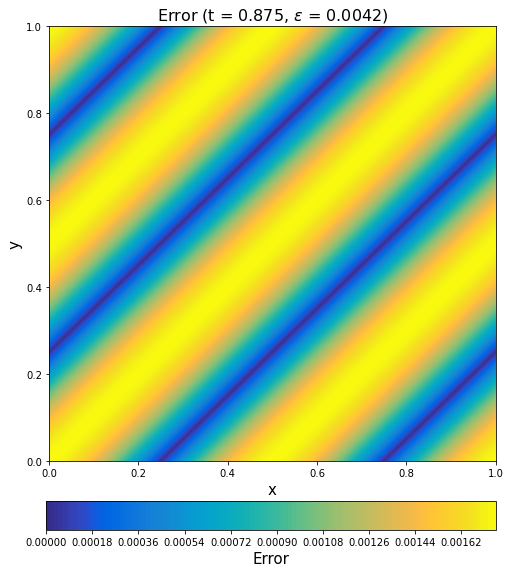

In [75]:
error_train_abs1_rotate9 = error_train_abs1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate9, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.875, $\epsilon$ = %.4f)' %(l2_error_train_list1[9]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

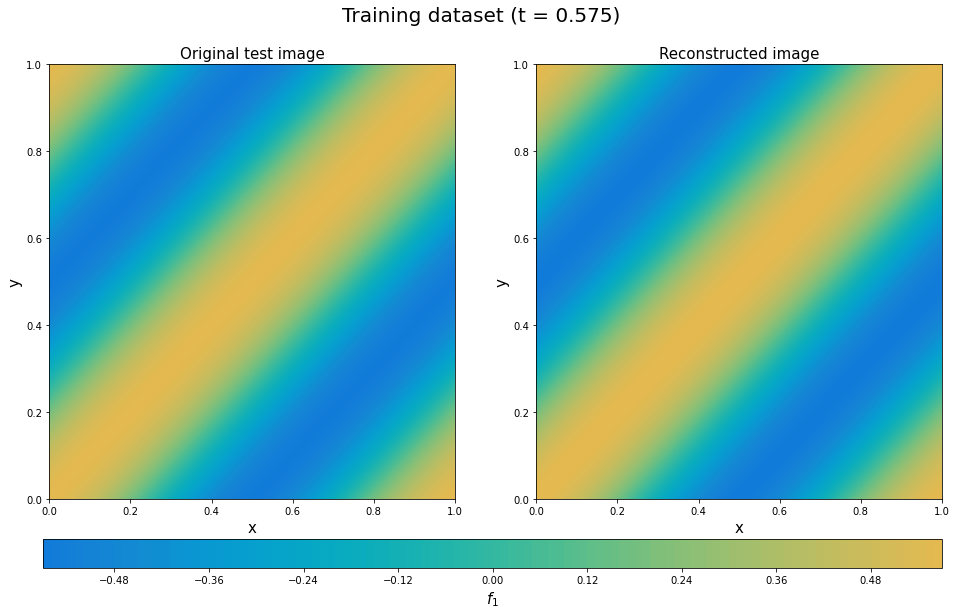

In [43]:
plt.figure(figsize=(16, 8))
y_train1_23_rotate = y_train1[23].T.reshape(101,101)
decoded_rotate1 = y_p_train1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_23_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[23]), fontsize=20)
plt.show()

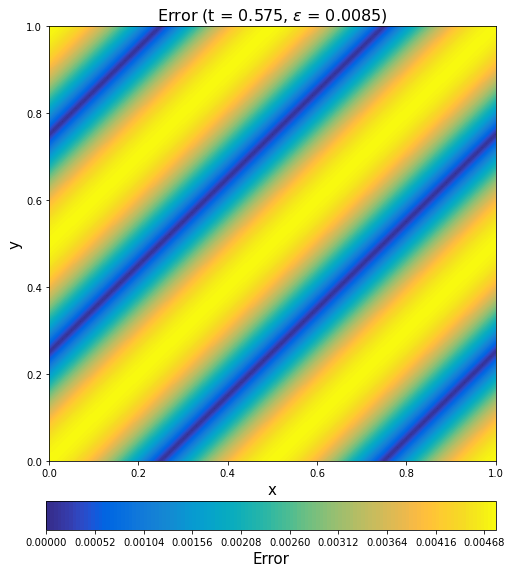

In [76]:
error_train_abs1_rotate23 = error_train_abs1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate23, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.575, $\epsilon$ = %.4f)' %(l2_error_train_list1[23]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

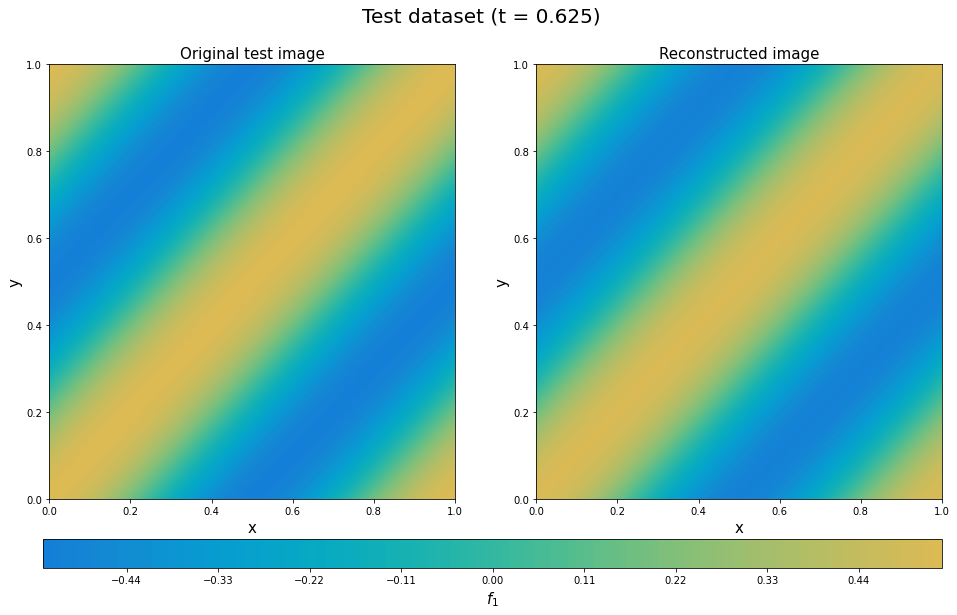

In [77]:
plt.figure(figsize=(16, 8))
y_test1_3_rotate = y_test1[3].T.reshape(101,101)
decoded_rotate1 = y_p_test1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[25]),fontsize=20)
plt.show()

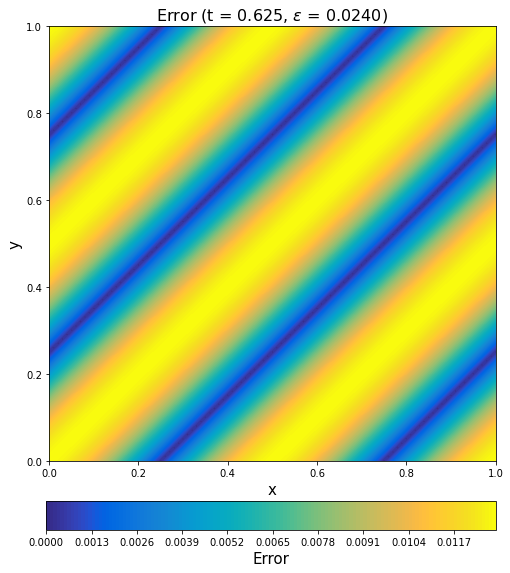

In [78]:
error_test_abs1_rotate3 = error_test_abs1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate3, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.625, $\epsilon$ = %.4f)' %(l2_error_test_list1[3]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

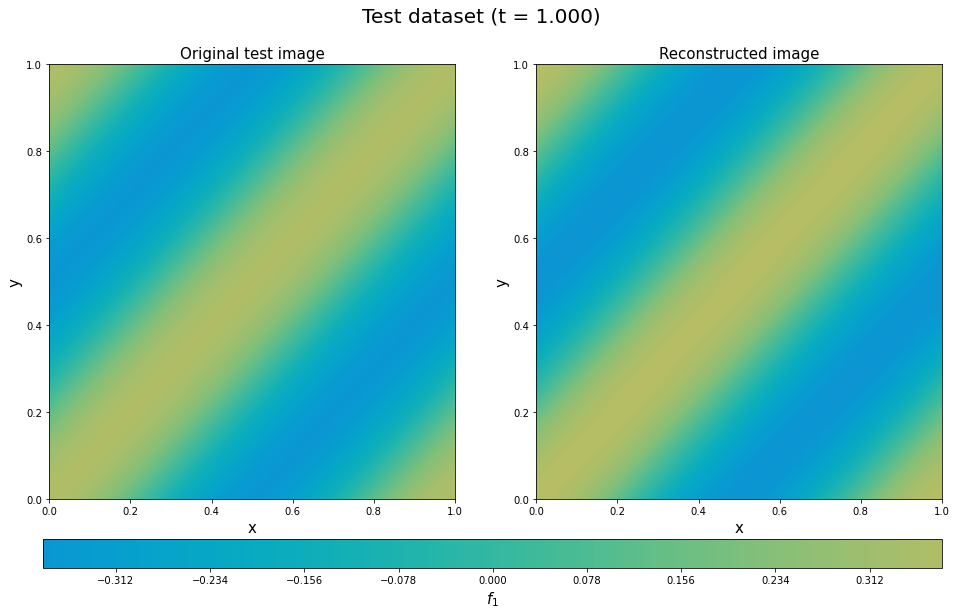

In [79]:
plt.figure(figsize=(16, 8))
y_test1_5_rotate = y_test1[5].T.reshape(101,101)
decoded_rotate1 = y_p_test1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_5_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[40]),fontsize=20)
plt.show()

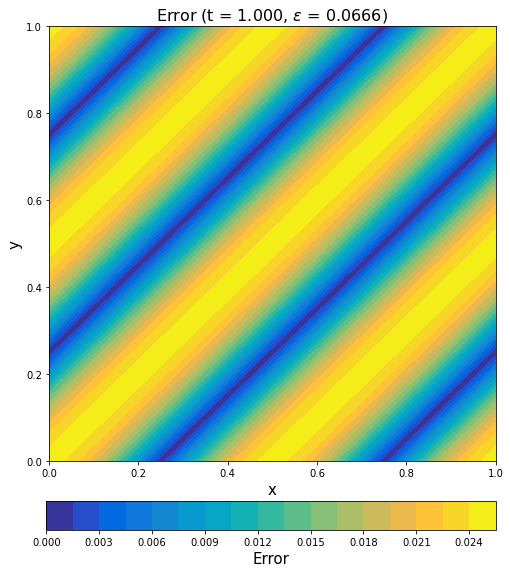

In [80]:
error_test_abs1_rotate5 = error_test_abs1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate5, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 1.000, $\epsilon$ = %.4f)' %(l2_error_test_list1[5]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 2: f2

In [82]:
out2 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out2[i, j, k] = x[j] + y[k] + t[i]

In [83]:
sensor2 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor2[i, j, k] = out2[i, 20*(j+1)+1, 20*(k+1)+1]

In [87]:
sensor2 = sensor2.reshape((41, 16))

In [88]:
sensor2.shape

(41, 16)

In [89]:
out2 = out2.reshape((41, -1))

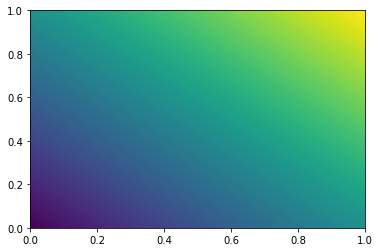

In [86]:
plt.contourf(xmesh, ymesh, out2[0,:,:], levels=128)

In [90]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(sensor2, out2, test_size=0.18, random_state=42)

In [91]:
start2 = datetime.datetime.now()
rfr2.fit(x_train2, y_train2)
end2 = datetime.datetime.now()
time2 = end2 - start2
print("Training time (Case 2):", time2)

Training time (Case 2): 0:00:40.321871


In [92]:
relation_square_train2 = rfr2.score(x_train2, y_train2)
print('결정계수(training)(%d): ' %i, relation_square_train2)
relation_square_test2 = rfr2.score(x_test2, y_test2)
print('결정계수(test)(%d): ' %i, relation_square_test2)
y_p_train2 = rfr2.predict(x_train2)
y_p_test2 = rfr2.predict(x_test2)

결정계수(training)(40):  0.9996465302108677
결정계수(test)(40):  0.9914253670988655


In [93]:
y_train2 = y_train2.reshape((33, 101, 101))
y_test2 = y_test2.reshape((8, 101, 101))
y_p_train2 = y_p_train2.reshape((33, 101, 101))
y_p_test2 = y_p_test2.reshape((8, 101, 101))

In [94]:
error_train_abs2 = np.abs(y_p_train2 - y_train2)
l2_error_train2 = np.sqrt(np.sum((y_p_train2 - y_train2)**2) / np.sum(y_train2**2))
print('l2_train = %.4f' %l2_error_train2)

l2_error_train_list2 = []
for j in range(0, x_train2.shape[0]):
    l2_error_train_data2 = np.sqrt(np.sum((y_p_train2[j] - y_train2[j])**2) / np.sum(y_train2[j]**2))
    l2_error_train_list2.append(l2_error_train_data2)
    
error_test_abs2 = np.abs(y_p_test2 - y_test2)
l2_error_test2 = np.sqrt(np.sum((y_p_test2 - y_test2)**2) / np.sum(y_test2**2))
print('l2_test = %.4f' %l2_error_test2)

l2_error_test_list2 = []
for j in range(0, x_test2.shape[0]):
    l2_error_test_data2 = np.sqrt(np.sum((y_p_test2[j] - y_test2[j])**2) / np.sum(y_test2[j]**2))
    l2_error_test_list2.append(l2_error_test_data2)

l2_train = 0.0035
l2_test = 0.0177


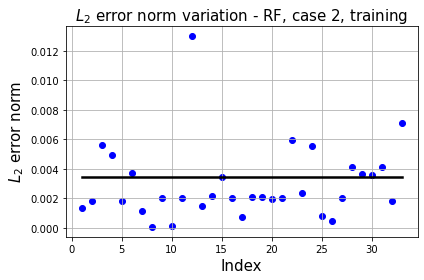

In [96]:
plt.plot(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train2*np.ones(x_train2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - RF, case 2, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

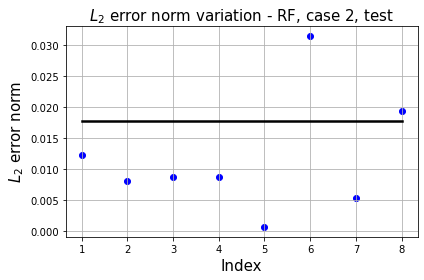

In [97]:
plt.plot(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test2*np.ones(x_test2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - RF, case 2, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

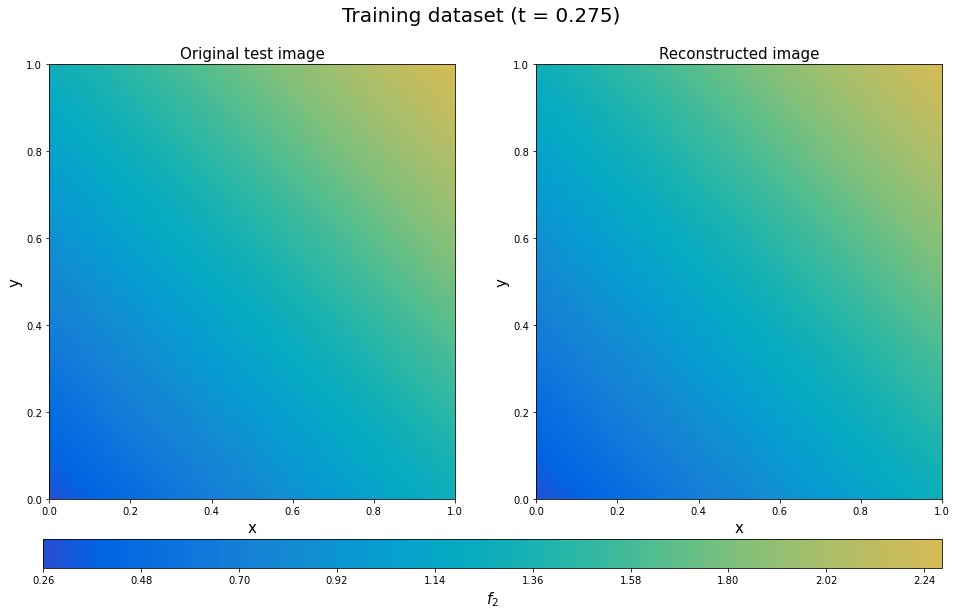

In [99]:
plt.figure(figsize=(16, 8))
y_train2_14_rotate = y_train2[14].T.reshape(101,101)
decoded_rotate2 = y_p_train2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_14_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[11]),fontsize=20)
plt.show()

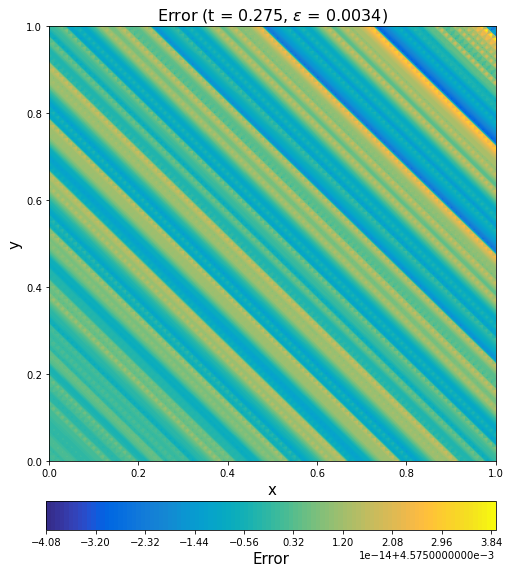

In [100]:
error_train_abs2_rotate14 = error_train_abs2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate14, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.275, $\epsilon$ = %.4f)' %(l2_error_train_list2[14]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

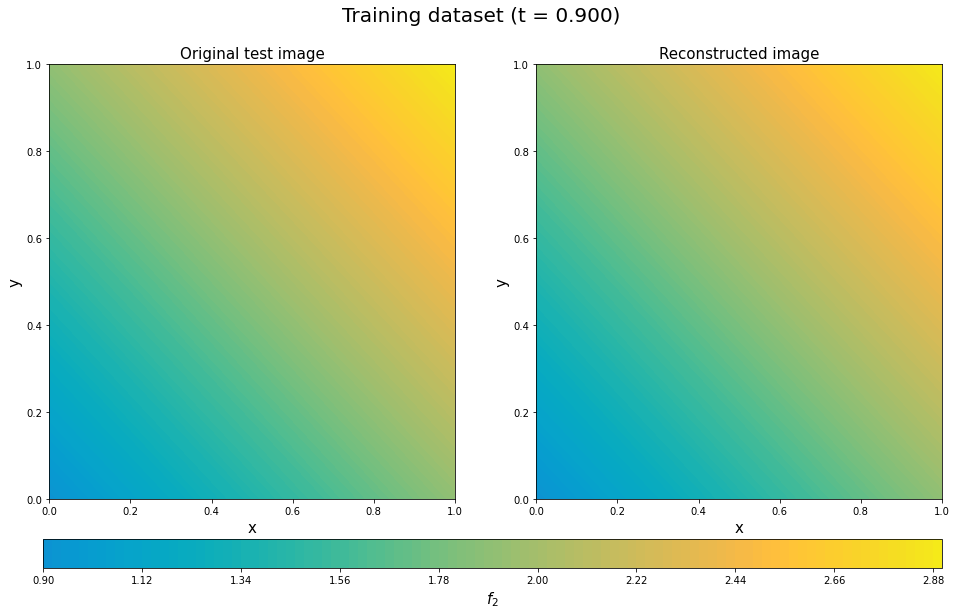

In [101]:
plt.figure(figsize=(16, 8))
y_train2_22_rotate = y_train2[22].T.reshape(101,101)
decoded_rotate2 = y_p_train2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_22_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[36]), fontsize=20)
plt.show()

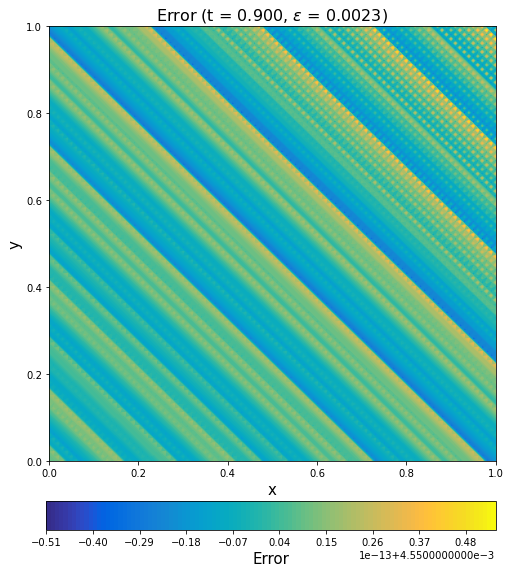

In [102]:
error_train_abs2_rotate22 = error_train_abs2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate22, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.900, $\epsilon$ = %.4f)' %(l2_error_train_list2[22]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

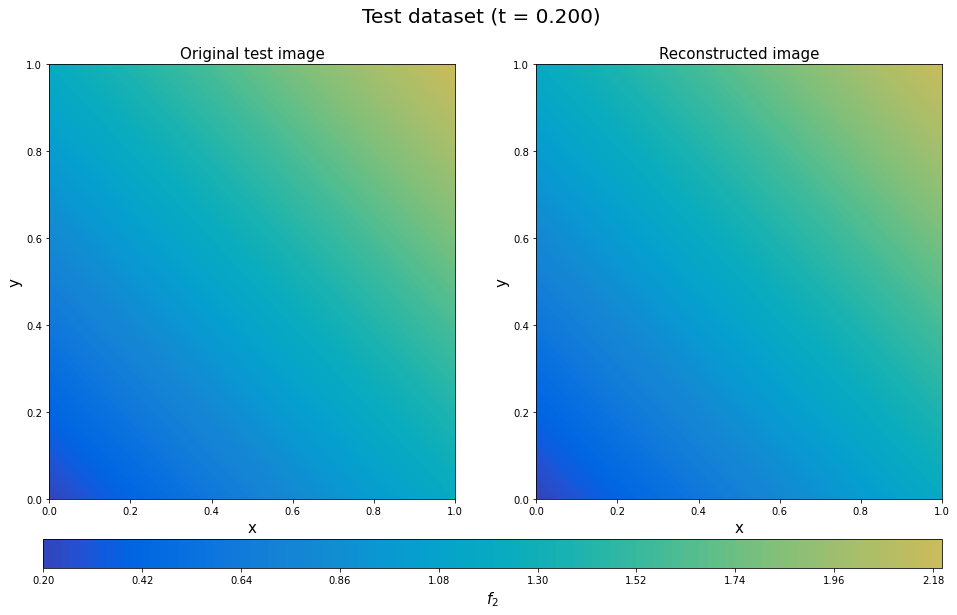

In [103]:
plt.figure(figsize=(16, 8))
y_test2_2_rotate = y_test2[2].T.reshape(101,101)
decoded_rotate2 = y_p_test2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

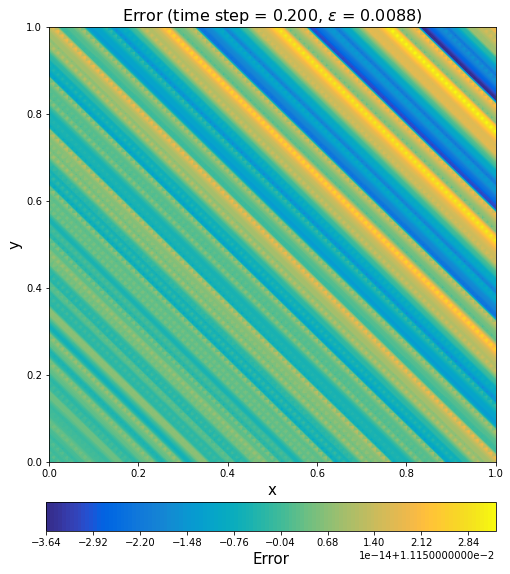

In [104]:
error_test_abs2_rotate2 = error_test_abs2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (time step = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list2[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

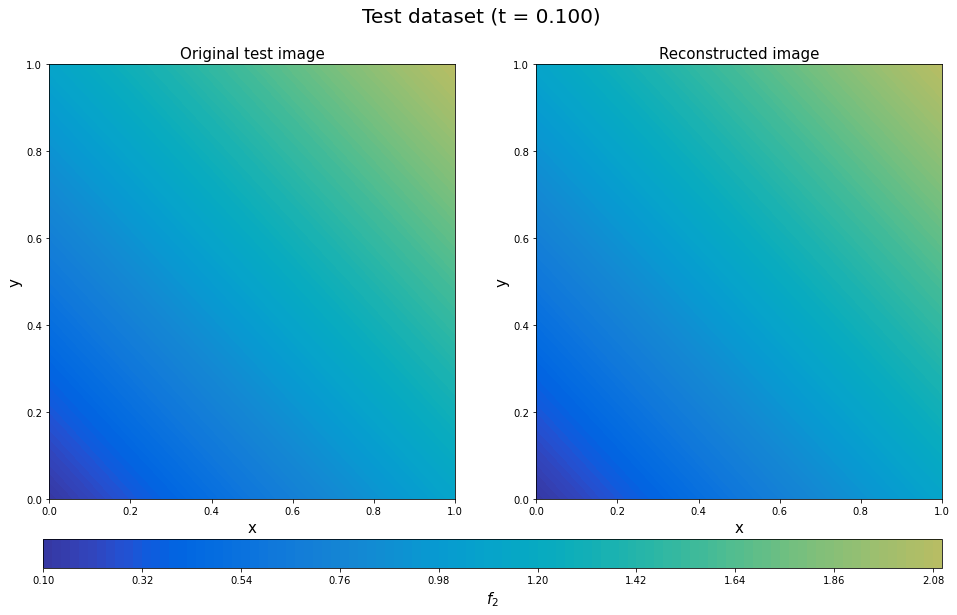

In [105]:
plt.figure(figsize=(16, 8))
y_test2_4_rotate = y_test2[4].T.reshape(101,101)
decoded_rotate2 = y_p_test2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_4_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[4]),fontsize=20)
plt.show()

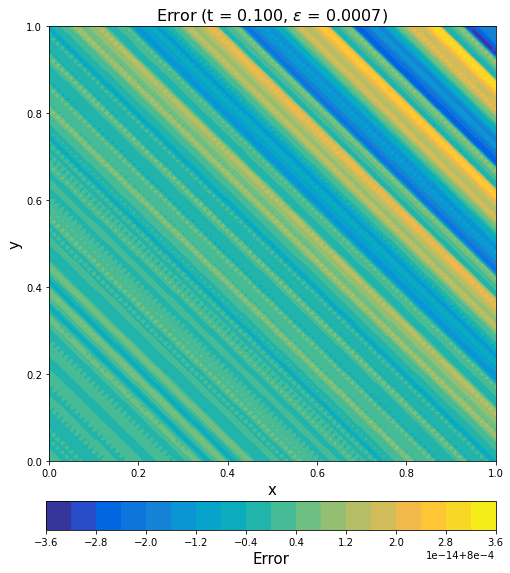

In [106]:
error_test_abs2_rotate4 = error_test_abs2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate4, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.100, $\epsilon$ = %.4f)' %(l2_error_test_list2[4]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 3: f3

In [130]:
out3 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out3[i, j, k] = np.exp(-t[i])*(2*np.sin(2*np.pi*x[j]) + np.sin(2*np.pi*x[j])*np.cos(2*np.pi*y[k]))

In [131]:
sensor3 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor3[i, j, k] = out3[i, 20*(j+1)+1, 20*(k+1)+1]

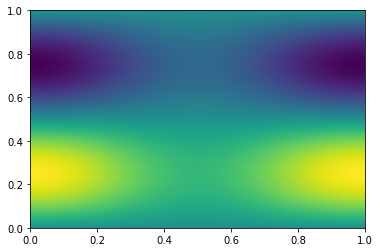

In [132]:
plt.contourf(xmesh, ymesh, out3[0,:,:], levels=128)

In [133]:
sensor3 = sensor3.reshape((41, 16))

In [134]:
out3 = out3.reshape((41, -1))

In [135]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(sensor3, out3, test_size=0.18, random_state=42)

In [136]:
start3 = datetime.datetime.now()
rfr3.fit(x_train3, y_train3)
end3 = datetime.datetime.now()
time3 = end3 - start3
print("Training time (Case 3):", time3)

Training time (Case 3): 0:00:40.641650


In [137]:
relation_square_train3 = rfr3.score(x_train3, y_train3)
print('결정계수(training)(%d): ' %i, relation_square_train3)
relation_square_test3 = rfr3.score(x_test3, y_test3)
print('결정계수(test)(%d): ' %i, relation_square_test3)
y_p_train3 = rfr3.predict(x_train3)
y_p_test3 = rfr3.predict(x_test3)

결정계수(training)(40):  0.9994428915461465
결정계수(test)(40):  0.9947133717284468


In [138]:
y_train3 = y_train3.reshape((33, 101, 101))
y_test3 = y_test3.reshape((8, 101, 101))
y_p_train3 = y_p_train3.reshape((33, 101, 101))
y_p_test3 = y_p_test3.reshape((8, 101, 101))

In [139]:
error_train_abs3 = np.abs(y_p_train3 - y_train3)
l2_error_train3 = np.sqrt(np.sum((y_p_train3 - y_train3)**2) / np.sum(y_train3**2))
print('l2_train = %.4f' %l2_error_train3)

l2_error_train_list3 = []
for j in range(0, x_train3.shape[0]):
    l2_error_train_data3 = np.sqrt(np.sum((y_p_train3[j] - y_train3[j])**2) / np.sum(y_train3[j]**2))
    l2_error_train_list3.append(l2_error_train_data3)
    
error_test_abs3 = np.abs(y_p_test3 - y_test3)
l2_error_test3 = np.sqrt(np.sum((y_p_test3 - y_test3)**2) / np.sum(y_test3**2))
print('l2_test = %.4f' %l2_error_test3)

l2_error_test_list3 = []
for j in range(0, x_test3.shape[0]):
    l2_error_test_data3 = np.sqrt(np.sum((y_p_test3[j] - y_test3[j])**2) / np.sum(y_test3[j]**2))
    l2_error_test_list3.append(l2_error_test_data3)

l2_train = 0.0066
l2_test = 0.0208


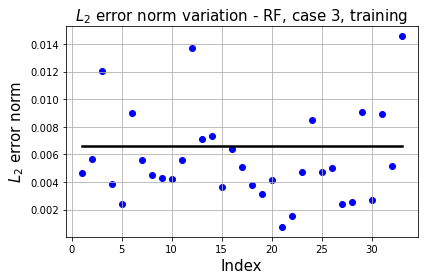

In [140]:
plt.plot(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train3*np.ones(x_train3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - RF, case 3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

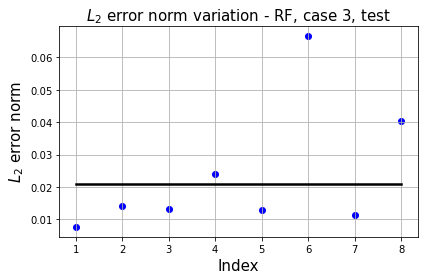

In [141]:
plt.plot(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test3*np.ones(x_test3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - RF, case 3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

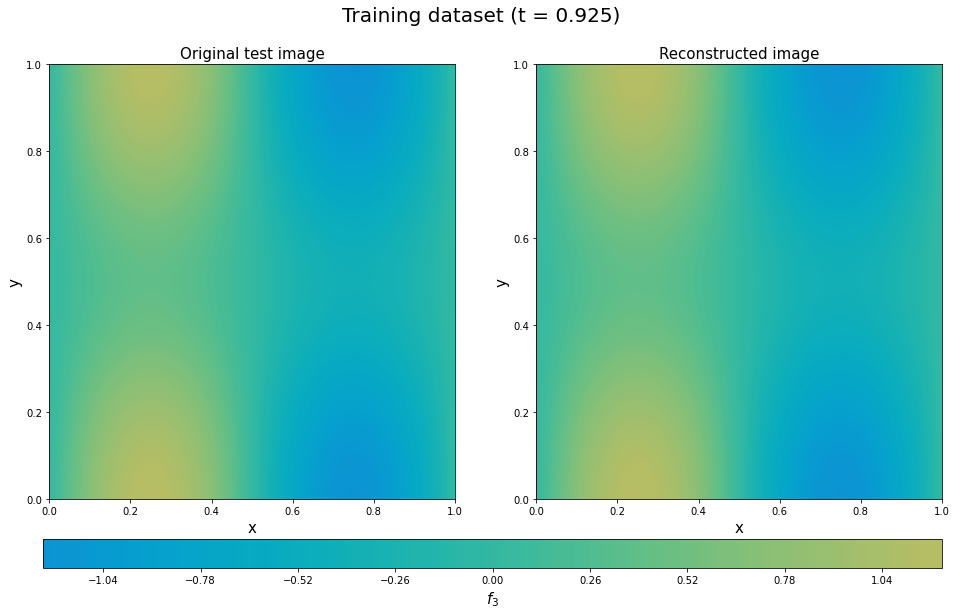

In [142]:
plt.figure(figsize=(16, 8))
y_train3_20_rotate = y_train3[20].T.reshape(101,101)
decoded_rotate3 = y_p_train3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_20_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[37]),fontsize=20)
plt.show()

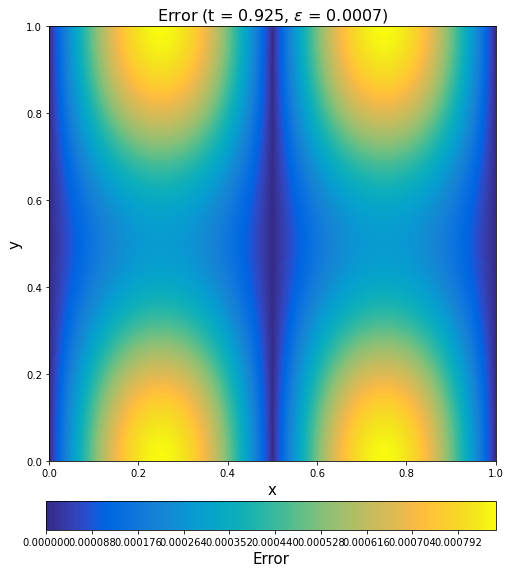

In [143]:
error_train_abs3_rotate20 = error_train_abs3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate20, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.925, $\epsilon$ = %.4f)' %(l2_error_train_list3[20]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

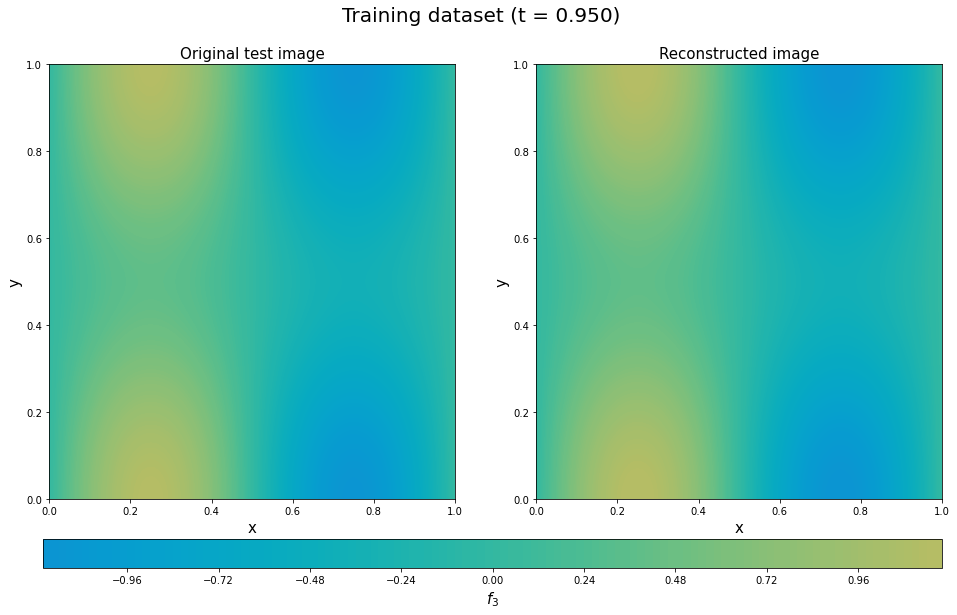

In [144]:
plt.figure(figsize=(16, 8))
y_train3_32_rotate = y_train3[32].T.reshape(101,101)
decoded_rotate3 = y_p_train3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_32_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[38]), fontsize=20)
plt.show()

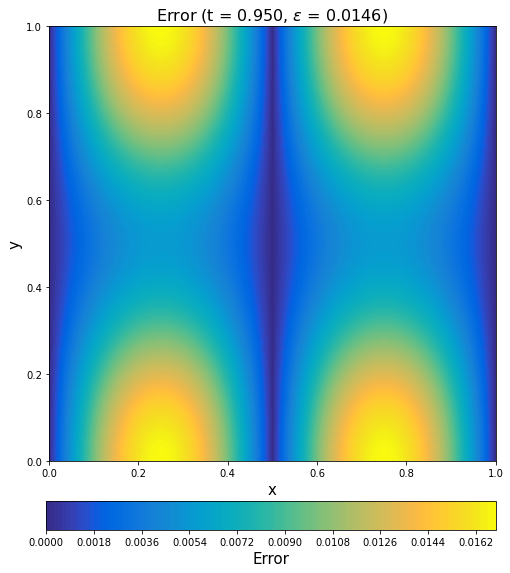

In [145]:
error_train_abs3_rotate32 = error_train_abs3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate32, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.950, $\epsilon$ = %.4f)' %(l2_error_train_list3[32]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

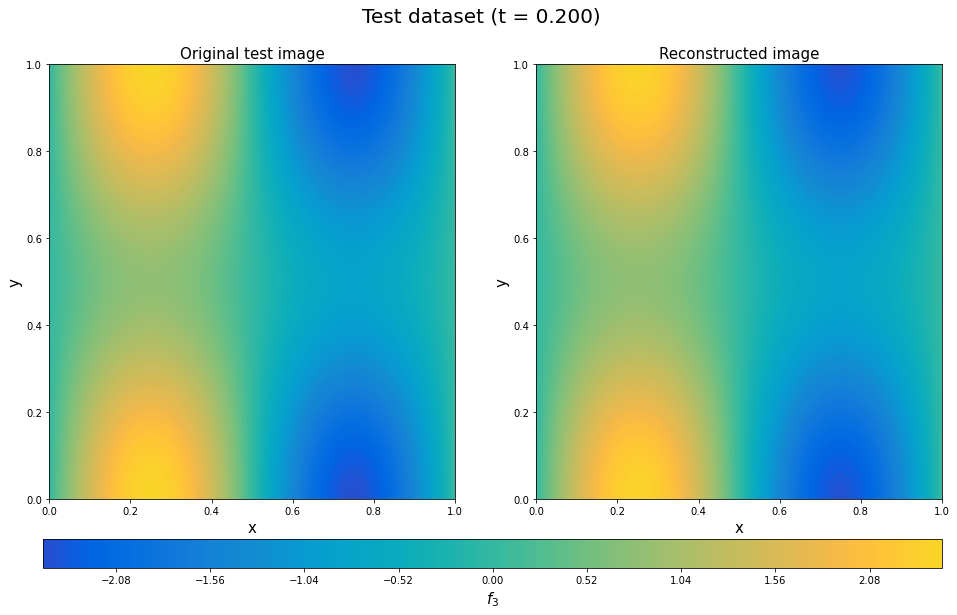

In [146]:
plt.figure(figsize=(16, 8))
y_test3_2_rotate = y_test3[2].T.reshape(101,101)
decoded_rotate3 = y_p_test3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

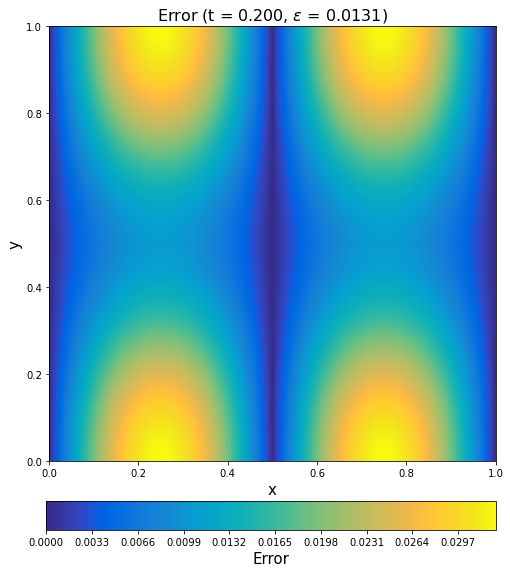

In [147]:
error_test_abs3_rotate2 = error_test_abs3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list3[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

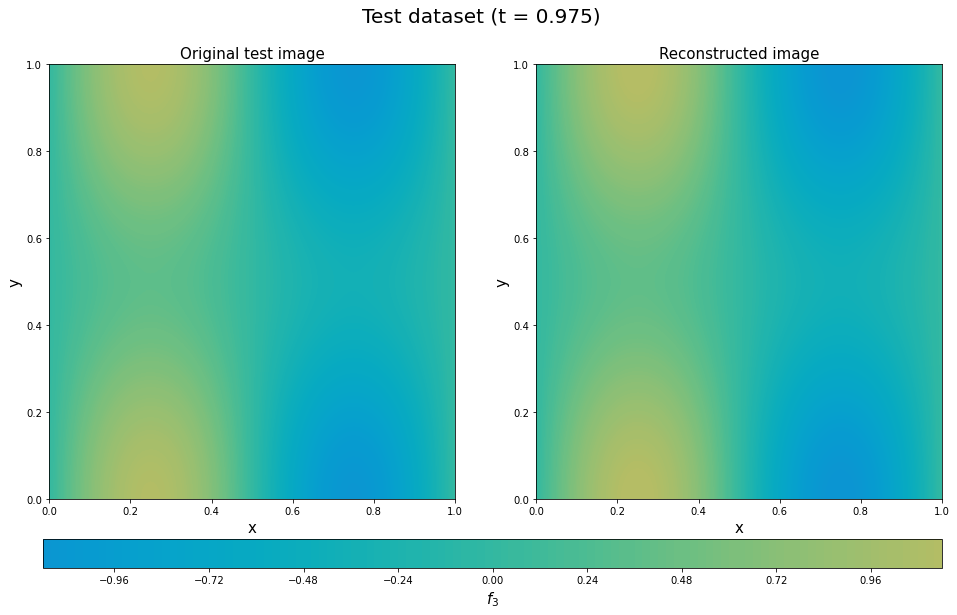

In [148]:
plt.figure(figsize=(16, 8))
y_test3_7_rotate = y_test3[7].T.reshape(101,101)
decoded_rotate3 = y_p_test3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_7_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[39]),fontsize=20)
plt.show()

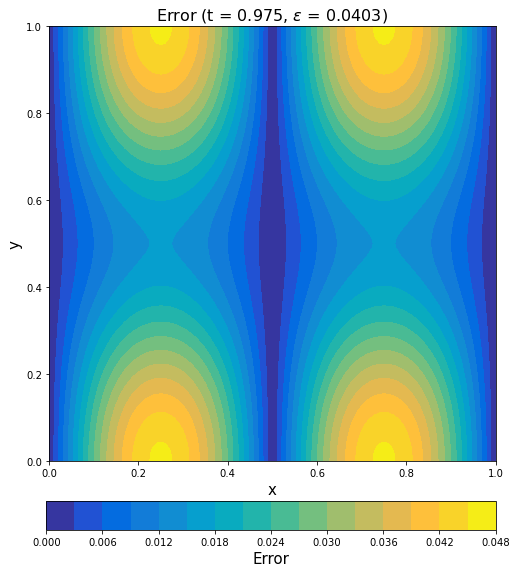

In [149]:
error_test_abs3_rotate7 = error_test_abs3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate7, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.975, $\epsilon$ = %.4f)' %(l2_error_test_list3[7]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()